# Introduction

This project was created to predict the trend of rising global temperatures using an ARIMA (AutoRegression, Integration, Moving Average) time series model. The steps follow a simple procedure of importing the necessesary tools for analysis and visualization. The dataset was pulled from https://datahub.io/core/global-temp and preprocessed to only include the temperatures recorded in March, every year from 1895 to 2016. 

In [ ]:
#Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters

In [2]:
#Load our dataset
data = 'tempset.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
#View first five rows
df.head()

,Date,Value
0,1895-03,39.97
1,1896-03,38.03
2,1897-03,38.79
3,1898-03,41.05
4,1899-03,37.63


In [5]:
#Preprocessing operations including setting datetime index for date column 
from datetime import datetime 
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
indexedDataset = df.set_index(['Date'])

In [6]:
indexedDataset.head(15)

,Value
Date,
1895-03-01,39.97
1896-03-01,38.03
1897-03-01,38.79
1898-03-01,41.05
1899-03-01,37.63
1900-03-01,41.27
1901-03-01,40.71
1902-03-01,41.58
1903-03-01,42.21


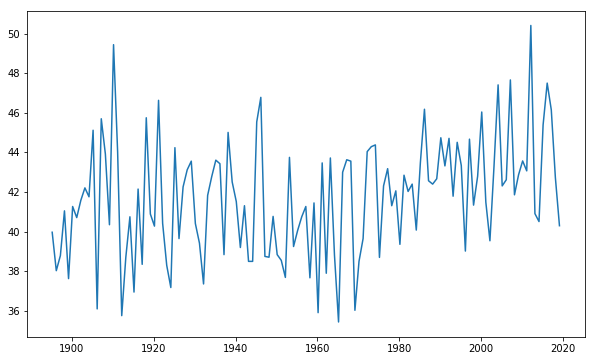

In [9]:
#Simple visaulization of our dataset
plt.plot(indexedDataset)

We can see some interesting details about our dataset. It appears there is a slight upward trend over the past 120 years. We will take closer look by examining rolling statistics  

In [10]:
#Set our rolling mean and standard deviation
rolmean = indexedDataset.rolling(window=5).mean()
rolstd = indexedDataset.rolling(window=5).std()
print(rolmean, rolstd)

             Value
Date              
1895-03-01     NaN
1896-03-01     NaN
1897-03-01     NaN
1898-03-01     NaN
1899-03-01  39.094
1900-03-01  39.354
1901-03-01  39.890
1902-03-01  40.448
1903-03-01  40.680
1904-03-01  41.506
1905-03-01  42.276
1906-03-01  41.354
1907-03-01  42.178
1908-03-01  42.520
1909-03-01  42.238
1910-03-01  43.102
1911-03-01  44.686
1912-03-01  42.698
1913-03-01  41.656
1914-03-01  41.736
1915-03-01  39.238
1916-03-01  38.864
1917-03-01  39.382
1918-03-01  40.790
1919-03-01  40.818
1920-03-01  41.484
1921-03-01  42.380
1922-03-01  42.794
1923-03-01  41.304
1924-03-01  40.562
...            ...
1990-03-01  43.712
1991-03-01  43.140
1992-03-01  43.568
1993-03-01  43.446
1994-03-01  43.814
1995-03-01  43.534
1996-03-01  42.674
1997-03-01  42.666
1998-03-01  42.576
1999-03-01  42.234
2000-03-01  42.774
2001-03-01  43.268
2002-03-01  42.242
2003-03-01  42.634
2004-03-01  43.556
2005-03-01  42.810
2006-03-01  43.036
2007-03-01  44.660
2008-03-01  44.372
2009-03-01  

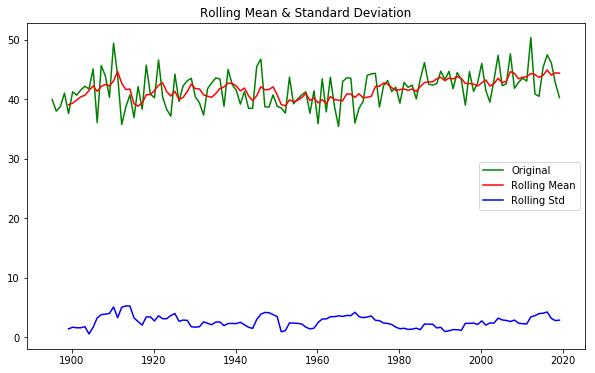

In [11]:
#Plot our rolling stats
orig = plt.plot(indexedDataset, color='green', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='blue', label= 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [12]:
#Perform Dickey Fuller Test

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Value'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -9.998621e+00
p-value                        1.910457e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.240000e+02
Critical Value (1%)           -3.484220e+00
Critical Value (5%)           -2.885145e+00
Critical Value (10%)          -2.579359e+00
dtype: float64


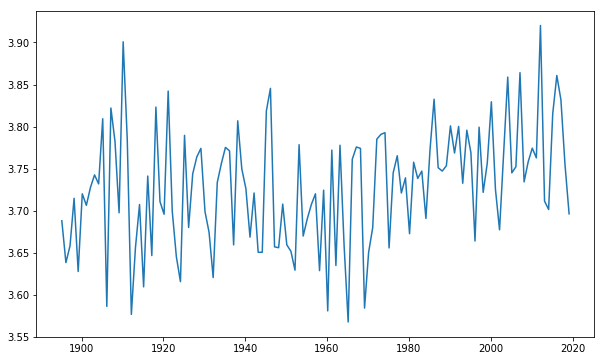

In [13]:
#Estimate the Trend displaying log values
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

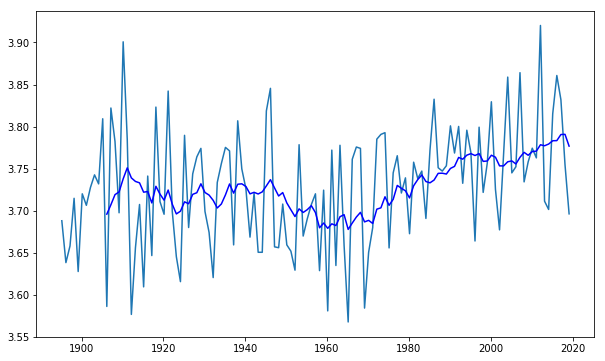

In [14]:
#show moving average using logScale
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='blue')

In [15]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(15)

#Remove Null Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Value
Date,
1906-03-01,-0.109682
1907-03-01,0.114959
1908-03-01,0.063231
1909-03-01,-0.024833
1910-03-01,0.162838
1911-03-01,0.033652
1912-03-01,-0.162220
1913-03-01,-0.078754
1914-03-01,-0.025716


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determine rolling statistics 
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
 
    #Plot rolling stats
    orig = plt.plot(timeseries, color='green', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='blue', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Value'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

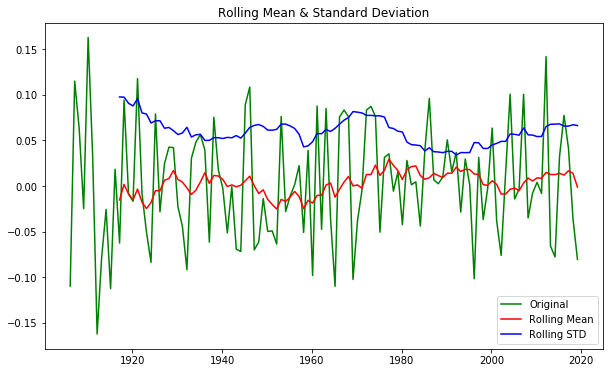

Results of Dickey-Fuller Test:
Test Statistic                -7.414759e+00
p-value                        6.982577e-11
#Lags Used                     2.000000e+00
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


In [17]:
test_stationarity(datasetLogScaleMinusMovingAverage)

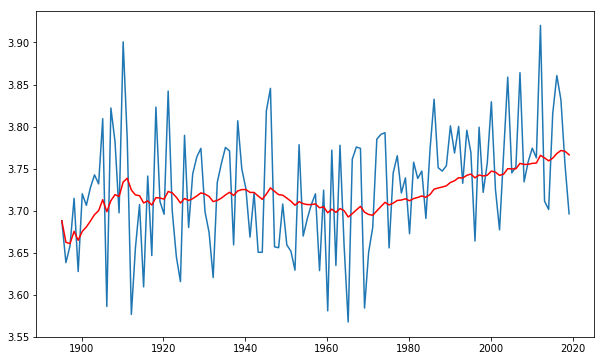

In [18]:
#Plotting our values to see if there is trend in time series 
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

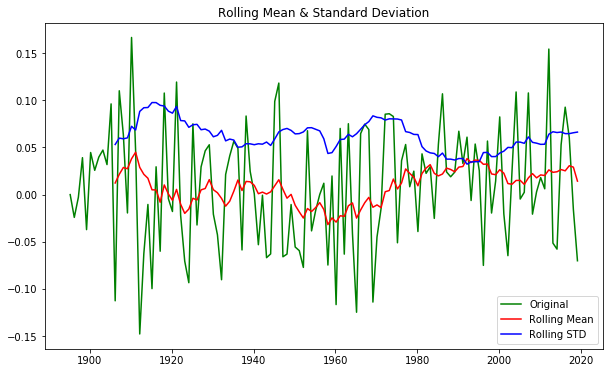

Results of Dickey-Fuller Test:
Test Statistic                -8.892160e+00
p-value                        1.234140e-14
#Lags Used                     1.000000e+00
Number of Observations Used    1.230000e+02
Critical Value (1%)           -3.484667e+00
Critical Value (5%)           -2.885340e+00
Critical Value (10%)          -2.579463e+00
dtype: float64


In [19]:
#Simple log scale then subtract the weighted average from it
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

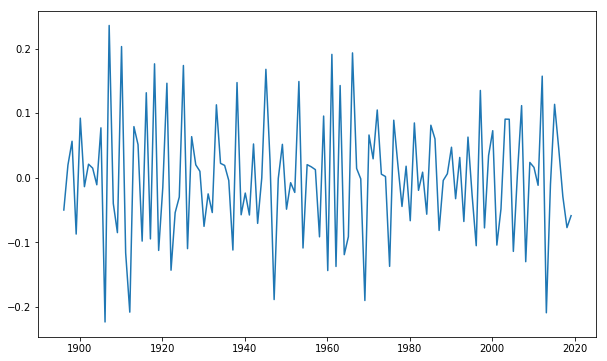

In [20]:
#shifting values
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

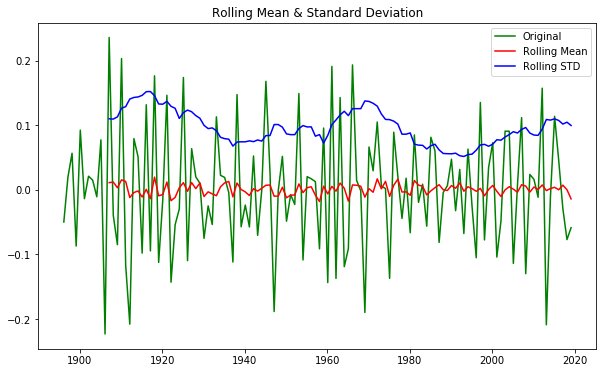

Results of Dickey-Fuller Test:
Test Statistic                -7.073175e+00
p-value                        4.877474e-10
#Lags Used                     9.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


In [22]:
#PLotting shifted values
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

C:\Users\Munir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-MAR will be used.
  % freq, ValueWarning)
C:\Users\Munir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-MAR will be used.
  % freq, ValueWarning)


Plotting AR model


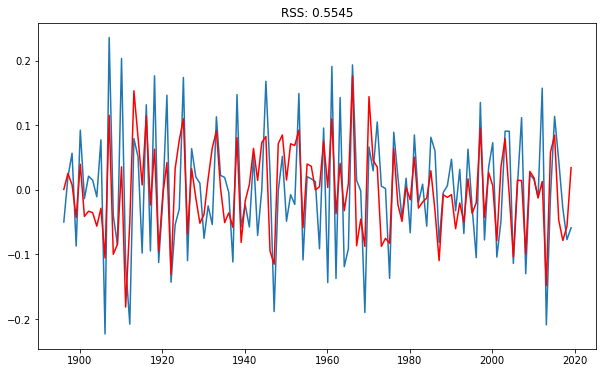

In [23]:
#(P,D,Q values can be changed to produce different RSS values (Residual Sum of Squares))
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting AR model')

Plotting MA model


C:\Users\Munir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-MAR will be used.
  % freq, ValueWarning)
C:\Users\Munir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-MAR will be used.
  % freq, ValueWarning)


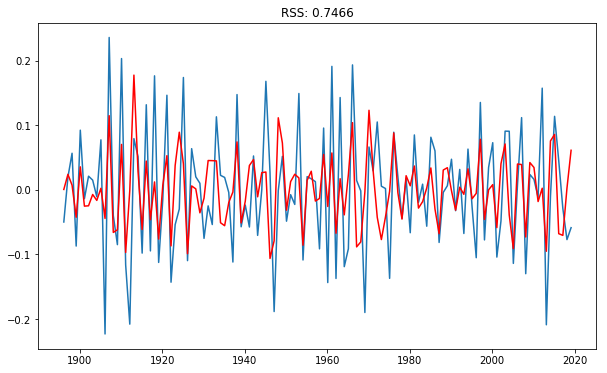

In [24]:
#Moving Average Model
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting MA model')

C:\Users\Munir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-MAR will be used.
  % freq, ValueWarning)
C:\Users\Munir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-MAR will be used.
  % freq, ValueWarning)


Plotting MA model


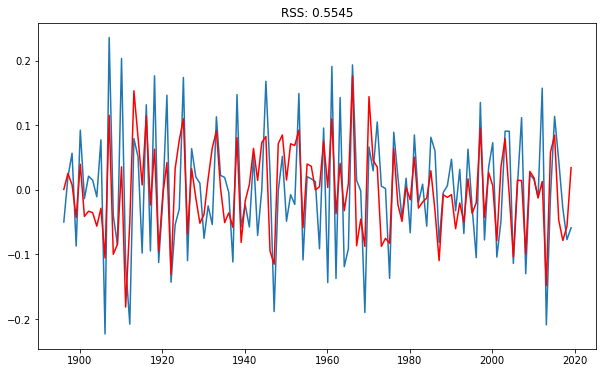

In [25]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting MA model')

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1896-03-01    0.000643
1897-03-01    0.025367
1898-03-01    0.007842
1899-03-01   -0.042678
1900-03-01    0.039587
dtype: float64


In [27]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1896-03-01    0.000643
1897-03-01    0.026011
1898-03-01    0.033852
1899-03-01   -0.008826
1900-03-01    0.030761
dtype: float64


In [28]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Value'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1895-03-01    3.688129
1896-03-01    3.688772
1897-03-01    3.714140
1898-03-01    3.721982
1899-03-01    3.679303
dtype: float64

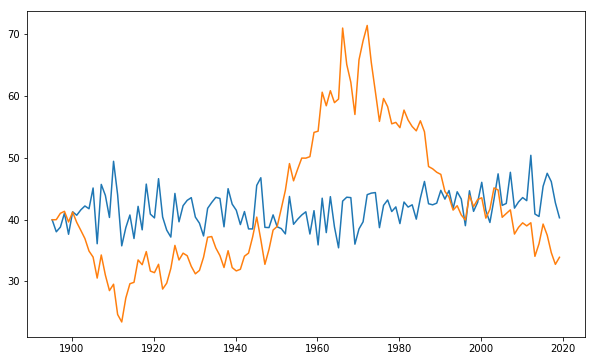

In [80]:
#Plot our values to our fitted model
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [29]:
indexedDataset_logScale

,Value
Date,
1895-03-01,3.688129
1896-03-01,3.638375
1897-03-01,3.658162
1898-03-01,3.714791
1899-03-01,3.627802
1900-03-01,3.720136
1901-03-01,3.706474
1902-03-01,3.727619
1903-03-01,3.742657


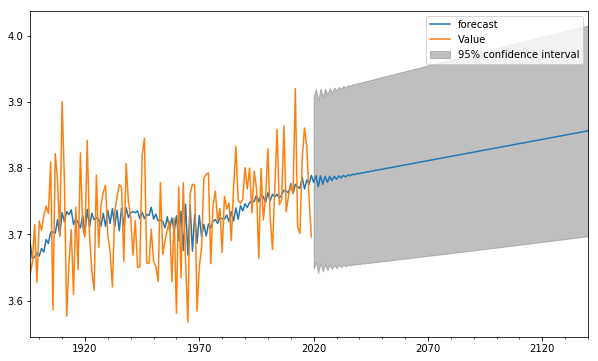

In [31]:
#Plot our prediction (125 rows indicates we have 125 years of values the plot below uses this time
#and an addition of 120 years to cast our prediction) 
results_ARIMA.plot_predict(1,245)
x=results_ARIMA.forecast(steps=120)
#We can see from our plot that our model is predicting an upwards trend based on our historical data

In [32]:
x[1]

array([0.06645052, 0.06653562, 0.06654877, 0.06722599, 0.06722778,
       0.0677137 , 0.06771842, 0.06807858, 0.06810073, 0.06838214,
       0.06842468, 0.06865543, 0.06871661, 0.06891393, 0.06899049,
       0.06916529, 0.06925386, 0.06941317, 0.06951081, 0.06965931,
       0.06976363, 0.06990447, 0.07001362, 0.07014895, 0.07026152,
       0.07039284, 0.07050779, 0.07063614, 0.0707527 , 0.07087883,
       0.07099644, 0.07112087, 0.07123913, 0.07136222, 0.07148083,
       0.07160286, 0.07172161, 0.07184277, 0.07196152, 0.07208193,
       0.07220057, 0.07232035, 0.0724388 , 0.07255801, 0.07267622,
       0.07279492, 0.07291285, 0.07303108, 0.0731487 , 0.07326648,
       0.07338378, 0.07350114, 0.07361811, 0.07373506, 0.07385168,
       0.07396825, 0.07408452, 0.0742007 , 0.07431662, 0.07443243,
       0.074548  , 0.07466344, 0.07477866, 0.07489374, 0.07500861,
       0.07512334, 0.07523786, 0.07535223, 0.07546641, 0.07558044,
       0.07569428, 0.07580795, 0.07592145, 0.07603479, 0.07614

In [33]:
len(x[1])

120